<a href="https://colab.research.google.com/github/tajuar-akash-hub/test_repo_for_colaboration/blob/main/insurance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/smshajid/mlhealthinsurance.git

Cloning into 'mlhealthinsurance'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 857.04 KiB | 7.72 MiB/s, done.


In [ ]:
import pandas as pd
import numpy as np
insurance_fraud=pd.read_excel('/content/mlhealthinsurance/Health Insurance Fraud Claims (8) (1).xlsx')
insurance_fraud.head(1)

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,Cluster,ClaimLegitimacy
0,4d76c7f7-d36a-4139-b451-a9a4ad10d7d5,19cf2638-3ec0-4ed9-9995-d9ba4553813a,a3d0cc80-dffe-40ff-a302-23c8ffeedb36,7820.52,2024-07-08,Ta150,iO013,96,F,Orthopedics,Pending,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,3,Legitimate


# info about the datasets(datatype,null-non_null)

In [ ]:
insurance_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ClaimID                  4500 non-null   object        
 1   PatientID                4500 non-null   object        
 2   ProviderID               4500 non-null   object        
 3   ClaimAmount              4500 non-null   float64       
 4   ClaimDate                4500 non-null   datetime64[ns]
 5   DiagnosisCode            4500 non-null   object        
 6   ProcedureCode            4500 non-null   object        
 7   PatientAge               4500 non-null   int64         
 8   PatientGender            4500 non-null   object        
 9   ProviderSpecialty        4500 non-null   object        
 10  ClaimStatus              4500 non-null   object        
 11  PatientIncome            4500 non-null   float64       
 12  PatientMaritalStatus     4500 non-

Create A copy

#Check the missing value(null values)

In [ ]:
insurance_fraud.isnull().sum()

,0
ClaimID,0
PatientID,0
ProviderID,0
ClaimAmount,0
ClaimDate,0
DiagnosisCode,0
ProcedureCode,0
PatientAge,0
PatientGender,0
ProviderSpecialty,0


# change the column name from `PatientIncome.1` to ` Marital status`

In [ ]:
insurance_fraud=insurance_fraud.rename(columns={'PatientIncome.1':'Marital_status'})
insurance_fraud.head(1)

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,Cluster,ClaimLegitimacy
0,4d76c7f7-d36a-4139-b451-a9a4ad10d7d5,19cf2638-3ec0-4ed9-9995-d9ba4553813a,a3d0cc80-dffe-40ff-a302-23c8ffeedb36,7820.52,2024-07-08,Ta150,iO013,96,F,Orthopedics,Pending,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,3,Legitimate


#Take a description about datasets(min,max,mean)

In [ ]:
insurance_fraud.describe()

,ClaimAmount,ClaimDate,PatientAge,PatientIncome,Cluster
count,4500.000000,4500,4500.000000,4500.000000,4500.000000
mean,5014.203867,2023-07-05 06:48:38.400000,49.838444,84384.284084,1.503111
min,100.120000,2022-07-09 00:00:00,0.000000,20006.870000,0.000000
25%,2509.072500,2023-01-07 18:00:00,25.000000,52791.905000,0.000000
50%,5053.765000,2023-07-03 00:00:00,50.500000,84061.205000,2.000000
75%,7462.452500,2023-12-29 00:00:00,75.000000,115768.417500,3.000000
max,9997.200000,2024-07-08 00:00:00,99.000000,149957.520000,3.000000
std,2866.291066,NaN,28.790471,37085.908878,1.127261


# check outliers in incomes and age

### 2.1 using Z-scores

In [ ]:
# using z-scores few more outliers algorithms use
def detect_outliers(data,x):
  outliers=[]
  thresold=1.5
  mean=np.mean(data[x])
  std=np.std(data[x])
  for i in data[x]:
    z_score=(i-mean)/std
    if np.abs(z_score) > thresold:
      outliers.append(i)
  return outliers


In [ ]:
#outliersb using z-scores with threshold 1.5
print(f"outliers in PatientIncome : {len(detect_outliers(insurance_fraud,'PatientIncome'))}")
print(f"outliers in claimamount : {len(detect_outliers(insurance_fraud,'ClaimAmount'))}")

outliers in PatientIncome : 625
outliers in claimamount : 604


###2.2 using IQR

In [ ]:
def iqr_outliers(data,x):
  Q1=np.percentile(data[x],25)
  Q3=np.percentile(data[x],75)
  IQR=Q3-Q1
  lower_bound=Q1 - (1.5 * IQR)
  upper_bound=Q1 + (1.5 * IQR)
  outliers=[]
  for i in data[x]:
    if i< lower_bound or i > upper_bound:
      outliers.append(i)
  return outliers



In [ ]:
## outliers in PatientIncome
income_outliers=len(iqr_outliers(insurance_fraud,"PatientIncome"))
# outliers in ClaimAmount
claim_outliers=len(iqr_outliers(insurance_fraud,"ClaimAmount"))
age_outliers=len(iqr_outliers(insurance_fraud,"PatientAge"))

print(f"outliers in PatientIncome : {income_outliers}")
print(f"outliers in claimamount : {claim_outliers}")
print(f"outliers in PatientAge : {age_outliers}")


outliers in PatientIncome : 78
outliers in claimamount : 26
outliers in PatientAge : 0


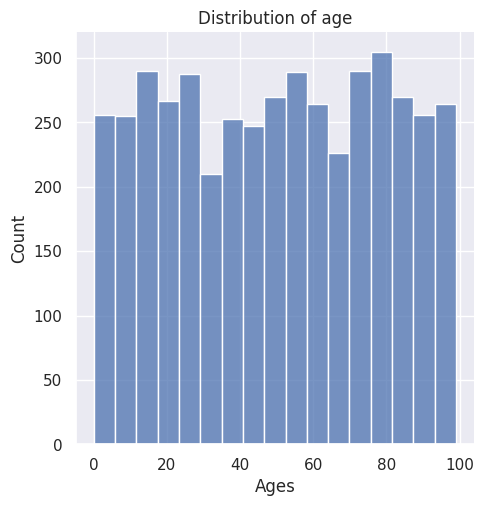

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes="red")
sns.displot(data=insurance_fraud["PatientAge"]).set(title="Distribution of age",xlabel="Ages")

# Check number of applicant whose age is less than 18

In [ ]:
age_under_18=insurance_fraud[insurance_fraud['PatientAge']< 18]
len(age_under_18)

801

#remove all the rows age_under_18

In [ ]:
insurance_fraud=insurance_fraud.drop(age_under_18.index)
insurance_fraud.shape

(3699, 19)

#remove unwanted columns from the datasets

In [ ]:
insurance_fraud=insurance_fraud[["ClaimDate","ClaimAmount","PatientAge","PatientGender","ProviderSpecialty","ClaimStatus","PatientIncome","PatientMaritalStatus","PatientEmploymentStatus","ProviderLocation","ClaimType","ClaimSubmissionMethod","ClaimLegitimacy"]]

print(f"Shape of the datasets: {insurance_fraud.shape}")

insurance_fraud.head(1)



Shape of the datasets: (3699, 13)


,ClaimDate,ClaimAmount,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,ClaimLegitimacy
0,2024-07-08,7820.52,96,F,Orthopedics,Pending,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,Legitimate


# all coulmns unique values

In [ ]:
all_unique=insurance_fraud.nunique()
all_unique_df = pd.DataFrame(all_unique, columns=['Unique Value Count'])
all_unique_df

,Unique Value Count
ClaimDate,725
ClaimAmount,3690
PatientAge,82
PatientGender,2
ProviderSpecialty,5
ClaimStatus,3
PatientIncome,3699
PatientMaritalStatus,4
PatientEmploymentStatus,4
ProviderLocation,3241


# Check duplicated values

In [ ]:
duplicates=insurance_fraud.duplicated()
flag=0
for duplicate in duplicates:
  if duplicate == True:
    flag=1
    print(f"duplicate values {duplicate}")
if flag == 0:
  print("No duplicates row")



No duplicates row


# Copy of Original data

In [ ]:
copy_insurance_fraud=insurance_fraud.copy()

#  Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le=LabelEncoder()

# Use Ordinal encoders to encode ClaimStatus

In [ ]:
ordinal_categories=["Denied","Pending","Approved"]
ordinal=OrdinalEncoder(categories=[ordinal_categories])
insurance_fraud["ClaimStatus"]=ordinal.fit_transform(insurance_fraud[["ClaimStatus"]])
insurance_fraud.head()

<ipython-input-22-f082f01cf799>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_fraud["ClaimStatus"]=ordinal.fit_transform(insurance_fraud[["ClaimStatus"]])


,ClaimDate,ClaimAmount,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,ClaimLegitimacy
0,2024-07-08,7820.52,96,F,Orthopedics,1.0,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,Legitimate
1,2024-07-08,5453.86,95,M,Cardiology,0.0,140772.72,Widowed,Employed,East Curtis,Inpatient,Online,Legitimate
3,2024-07-08,9519.16,59,F,Cardiology,1.0,135530.12,Married,Employed,Martinstad,Routine,Phone,Legitimate
4,2024-07-08,3226.15,36,F,Neurology,2.0,36995.52,Divorced,Unemployed,Thomasfurt,Inpatient,Phone,Legitimate
5,2024-07-07,3476.56,26,F,Cardiology,0.0,96819.09,Divorced,Retired,North Michael,Outpatient,Paper,Legitimate


In [ ]:
categorical_columns=["PatientGender",
                     "ClaimLegitimacy",
                     "ProviderSpecialty",
                     "PatientMaritalStatus",
                     "PatientEmploymentStatus",
                     "ProviderLocation",
                     "ClaimType",
                     "ClaimSubmissionMethod"
                     ]
for col in categorical_columns:
  insurance_fraud[col]=le.fit_transform(insurance_fraud[col])

insurance_fraud.head()

<ipython-input-24-7b9ec8dc03f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_fraud[col]=le.fit_transform(insurance_fraud[col])
<ipython-input-24-7b9ec8dc03f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_fraud[col]=le.fit_transform(insurance_fraud[col])
<ipython-input-24-7b9ec8dc03f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,ClaimDate,ClaimAmount,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,ClaimLegitimacy
0,2024-07-08,7820.52,96,0,3,1.0,57595.11,2,0,1582,1,1,1
1,2024-07-08,5453.86,95,1,0,0.0,140772.72,3,0,479,1,0,1
3,2024-07-08,9519.16,59,0,0,1.0,135530.12,1,0,1444,3,2,1
4,2024-07-08,3226.15,36,0,2,2.0,36995.52,0,3,2863,1,2,1
5,2024-07-07,3476.56,26,0,0,0.0,96819.09,0,1,1974,2,1,1


In [ ]:
insurance_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3699 entries, 0 to 4499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ClaimDate                3699 non-null   datetime64[ns]
 1   ClaimAmount              3699 non-null   float64       
 2   PatientAge               3699 non-null   int64         
 3   PatientGender            3699 non-null   int64         
 4   ProviderSpecialty        3699 non-null   int64         
 5   ClaimStatus              3699 non-null   float64       
 6   PatientIncome            3699 non-null   float64       
 7   PatientMaritalStatus     3699 non-null   int64         
 8   PatientEmploymentStatus  3699 non-null   int64         
 9   ProviderLocation         3699 non-null   int64         
 10  ClaimType                3699 non-null   int64         
 11  ClaimSubmissionMethod    3699 non-null   int64         
 12  ClaimLegitimacy          3699 non-null 

In [ ]:

Legit_Claim=insurance_fraud["ClaimLegitimacy"].value_counts()

print(f" Value counts of Legit_Claim: {Legit_Claim}")



 Value counts of Legit_Claim: ClaimLegitimacy
1    3473
0     226
Name: count, dtype: int64


# OverSampling to Spread the target data equal class

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:

# Convert 'ClaimDate' to ordinal

insurance_fraud['ClaimDate'] = pd.to_datetime(insurance_fraud['ClaimDate']).apply(lambda date: date.toordinal())
X= insurance_fraud.drop('ClaimLegitimacy',axis=1)
y= insurance_fraud['ClaimLegitimacy']
smote = SMOTE(random_state=42)
X_resampled , y_resampled = smote.fit_resample(X,y)

oversampled_df = pd.DataFrame(X_resampled , columns = X.columns)
oversampled_df['class'] = y_resampled

# Shape of new Oversampled_df datasets

In [ ]:
value_counts = oversampled_df.groupby('class').size().reset_index(name = 'Count')

print(value_counts)


   class  Count
0      0   3473
1      1   3473


In [ ]:
oversampled_df.shape

(6946, 13)

# EDA Section

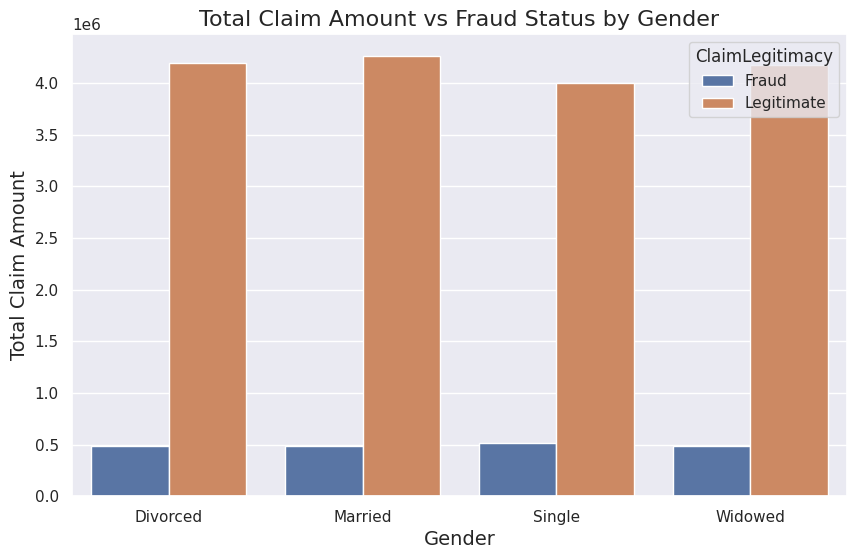

In [ ]:
# Grouping by Gender and Fraud Status to sum the Claim Amounts
grouped_data = copy_insurance_fraud.groupby(['PatientMaritalStatus', 'ClaimLegitimacy'])['ClaimAmount'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Barplot to show Total Claim Amount vs Fraud for Male and Female
sns.barplot(x='PatientMaritalStatus', y='ClaimAmount', hue='ClaimLegitimacy', data=grouped_data)

# Labels and Title
plt.title('Total Claim Amount vs Fraud Status by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total Claim Amount', fontsize=14)

# Show plot
plt.show()

# Fradulent activity by Age Range

In [ ]:
copy_insurance_fraud['ClaimLegitimacy'].value_counts()

,count
ClaimLegitimacy,
Legitimate,3473
Fraud,226


# Fraud activaity by age

<ipython-input-33-d90ec5467572>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_claims['AgeRange'] = pd.cut(fraudulent_claims['PatientAge'], bins=age_bins, labels=age_labels)
<ipython-input-33-d90ec5467572>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud_count = fraudulent_claims.groupby('AgeRange').size().reset_index(name='FraudCount')
<ipython-input-33-d90ec5467572>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

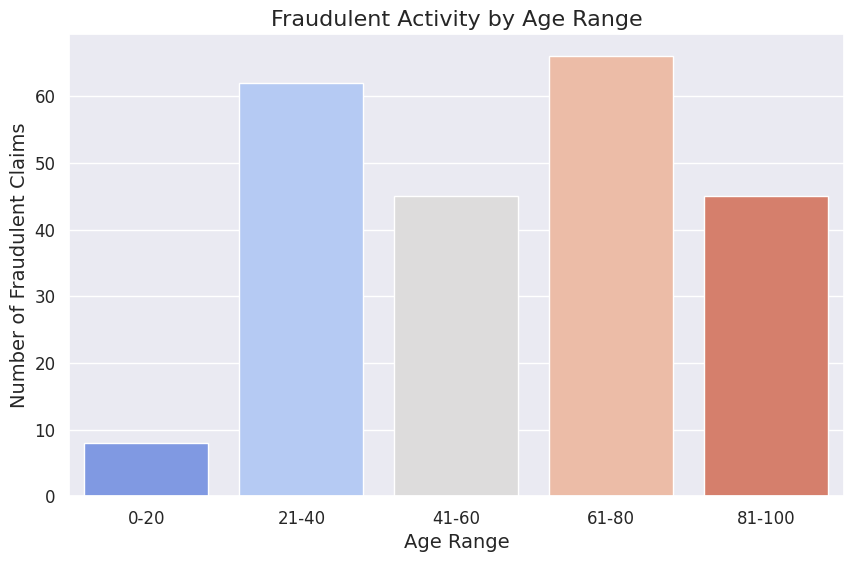

In [ ]:
# Filter only fraudulent claims (ClaimLegitimacy = 0 for fraudulent)
fraudulent_claims =copy_insurance_fraud[copy_insurance_fraud['ClaimLegitimacy'] == "Fraud"]

# Define age ranges (bins) for grouping
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column 'AgeRange' based on the bins

fraudulent_claims['AgeRange'] = pd.cut(fraudulent_claims['PatientAge'], bins=age_bins, labels=age_labels)

# Group by AgeRange and count the number of fraudulent claims
age_fraud_count = fraudulent_claims.groupby('AgeRange').size().reset_index(name='FraudCount')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeRange', y='FraudCount', data=age_fraud_count, palette='coolwarm')

plt.title('Fraudulent Activity by Age Range', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Number of Fraudulent Claims', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


# Gender dstribution

<ipython-input-34-a101bbe54ac2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


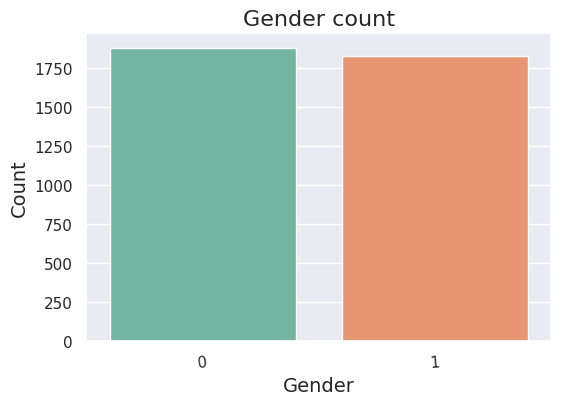

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
set
plt.figure(figsize=(6,4))  # Larger figure size for better visibility

# Calculate counts
counts =insurance_fraud['PatientGender'].value_counts()

# Plotting bar chart
sns.barplot(x=counts.index, y=counts.values, palette='Set2')

# Adding title and labels
plt.title("Gender count", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=5)  # Rotate x labels for better readability if needed

plt.show()


In [ ]:
insurance_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3699 entries, 0 to 4499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimDate                3699 non-null   int64  
 1   ClaimAmount              3699 non-null   float64
 2   PatientAge               3699 non-null   int64  
 3   PatientGender            3699 non-null   int64  
 4   ProviderSpecialty        3699 non-null   int64  
 5   ClaimStatus              3699 non-null   float64
 6   PatientIncome            3699 non-null   float64
 7   PatientMaritalStatus     3699 non-null   int64  
 8   PatientEmploymentStatus  3699 non-null   int64  
 9   ProviderLocation         3699 non-null   int64  
 10  ClaimType                3699 non-null   int64  
 11  ClaimSubmissionMethod    3699 non-null   int64  
 12  ClaimLegitimacy          3699 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 404.6 KB


In [ ]:
copy_insurance_fraud["ClaimType"].value_counts()

,count
ClaimType,
Routine,944
Outpatient,942
Emergency,908
Inpatient,905


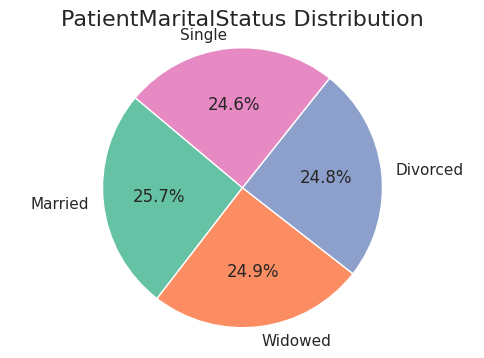

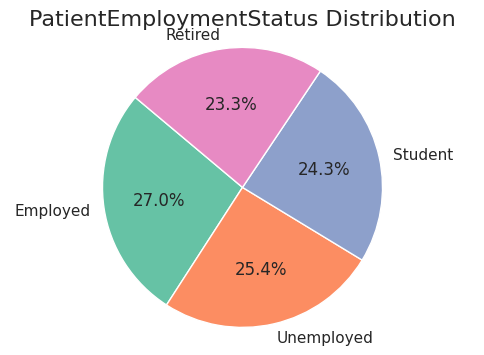

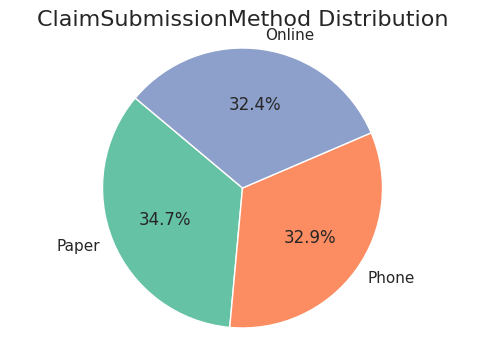

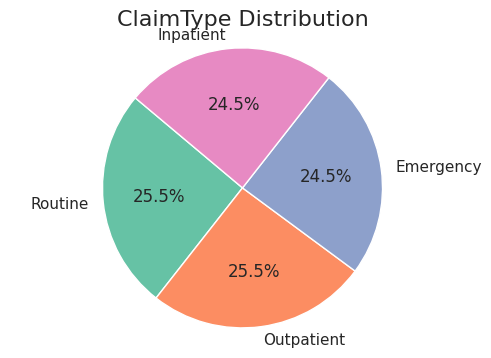

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Added import for seaborn since you're using its color palette

features=["PatientMaritalStatus","PatientEmploymentStatus","ClaimSubmissionMethod","ClaimType"]

# Loop through each feature to generate a pie chart
for f in features:
    plt.figure(figsize=(6,4))  # Set the figure size to 10x8 inches for better visibility

    # Calculate the value counts for the feature, normalize them to percentages
    counts = copy_insurance_fraud[f].value_counts(normalize=True) * 100  # Multiplied by 100 to get percentages

    # Plotting a pie chart with percentage labels on each slice
    plt.pie(counts,
            labels=counts.index,  # Label each slice with the unique values of the feature
            autopct='%1.1f%%',  # Show percentage with 1 decimal place
            startangle=140,  # Rotate the chart for a consistent starting point
            colors=sns.color_palette('Set2'))  # Use a color palette from seaborn

    # Add a title indicating which feature the pie chart represents
    plt.title(f'{f} Distribution', fontsize=16)

    # Ensures the pie chart is a perfect circle
    plt.axis('equal')

    # Display the pie chart
    plt.show()
    print("\n")



<ipython-input-40-81c63c155a7f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


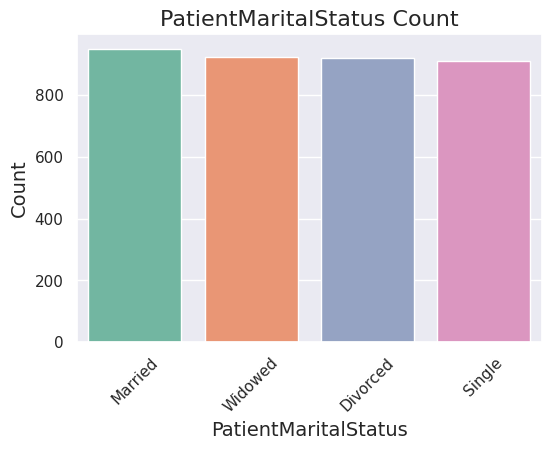

<ipython-input-40-81c63c155a7f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


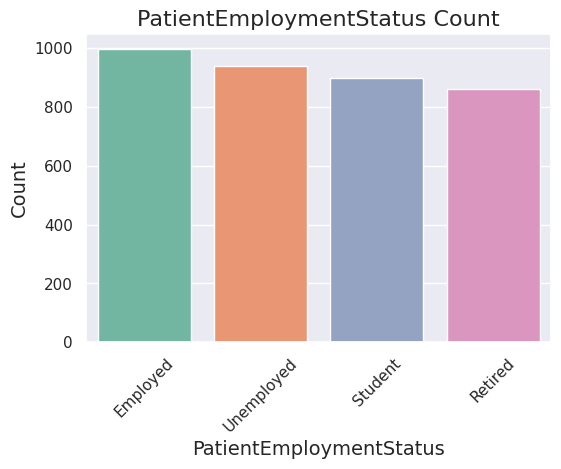

<ipython-input-40-81c63c155a7f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


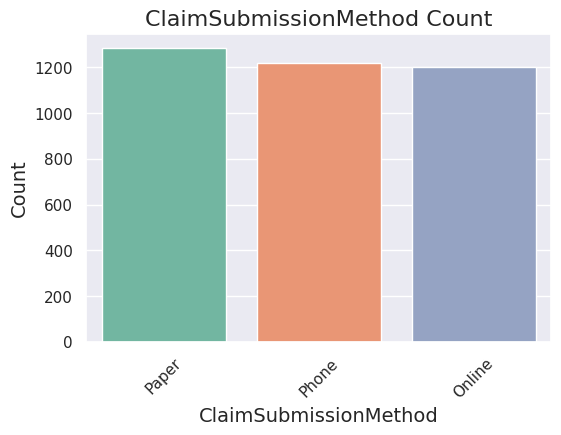

<ipython-input-40-81c63c155a7f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


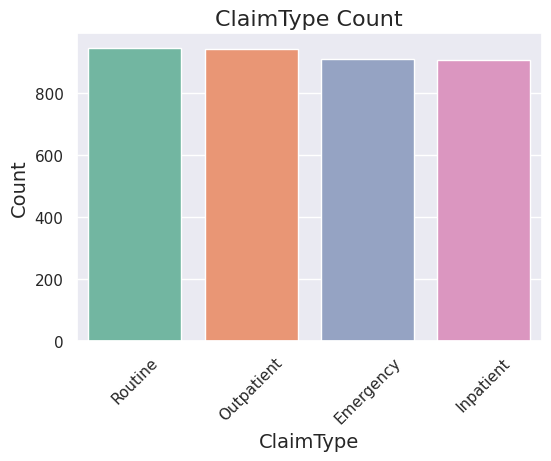

In [ ]:
features=["PatientMaritalStatus","PatientEmploymentStatus","ClaimSubmissionMethod","ClaimType"]

for f in features:
  plt.figure(figsize=(6,4))  # Larger figure size for better visibility

  # Calculate counts
  counts = copy_insurance_fraud[f].value_counts()

  # Plotting bar chart
  sns.barplot(x=counts.index, y=counts.values, palette='Set2')

  # Adding title and labels
  plt.title(f'{f} Count', fontsize=16)
  plt.xlabel(f'{f}', fontsize=14)
  plt.ylabel('Count', fontsize=14)

  plt.xticks(rotation=45)  # Rotate x labels for better readability if needed

  plt.show()


# Create heatmap to show co-relations between features

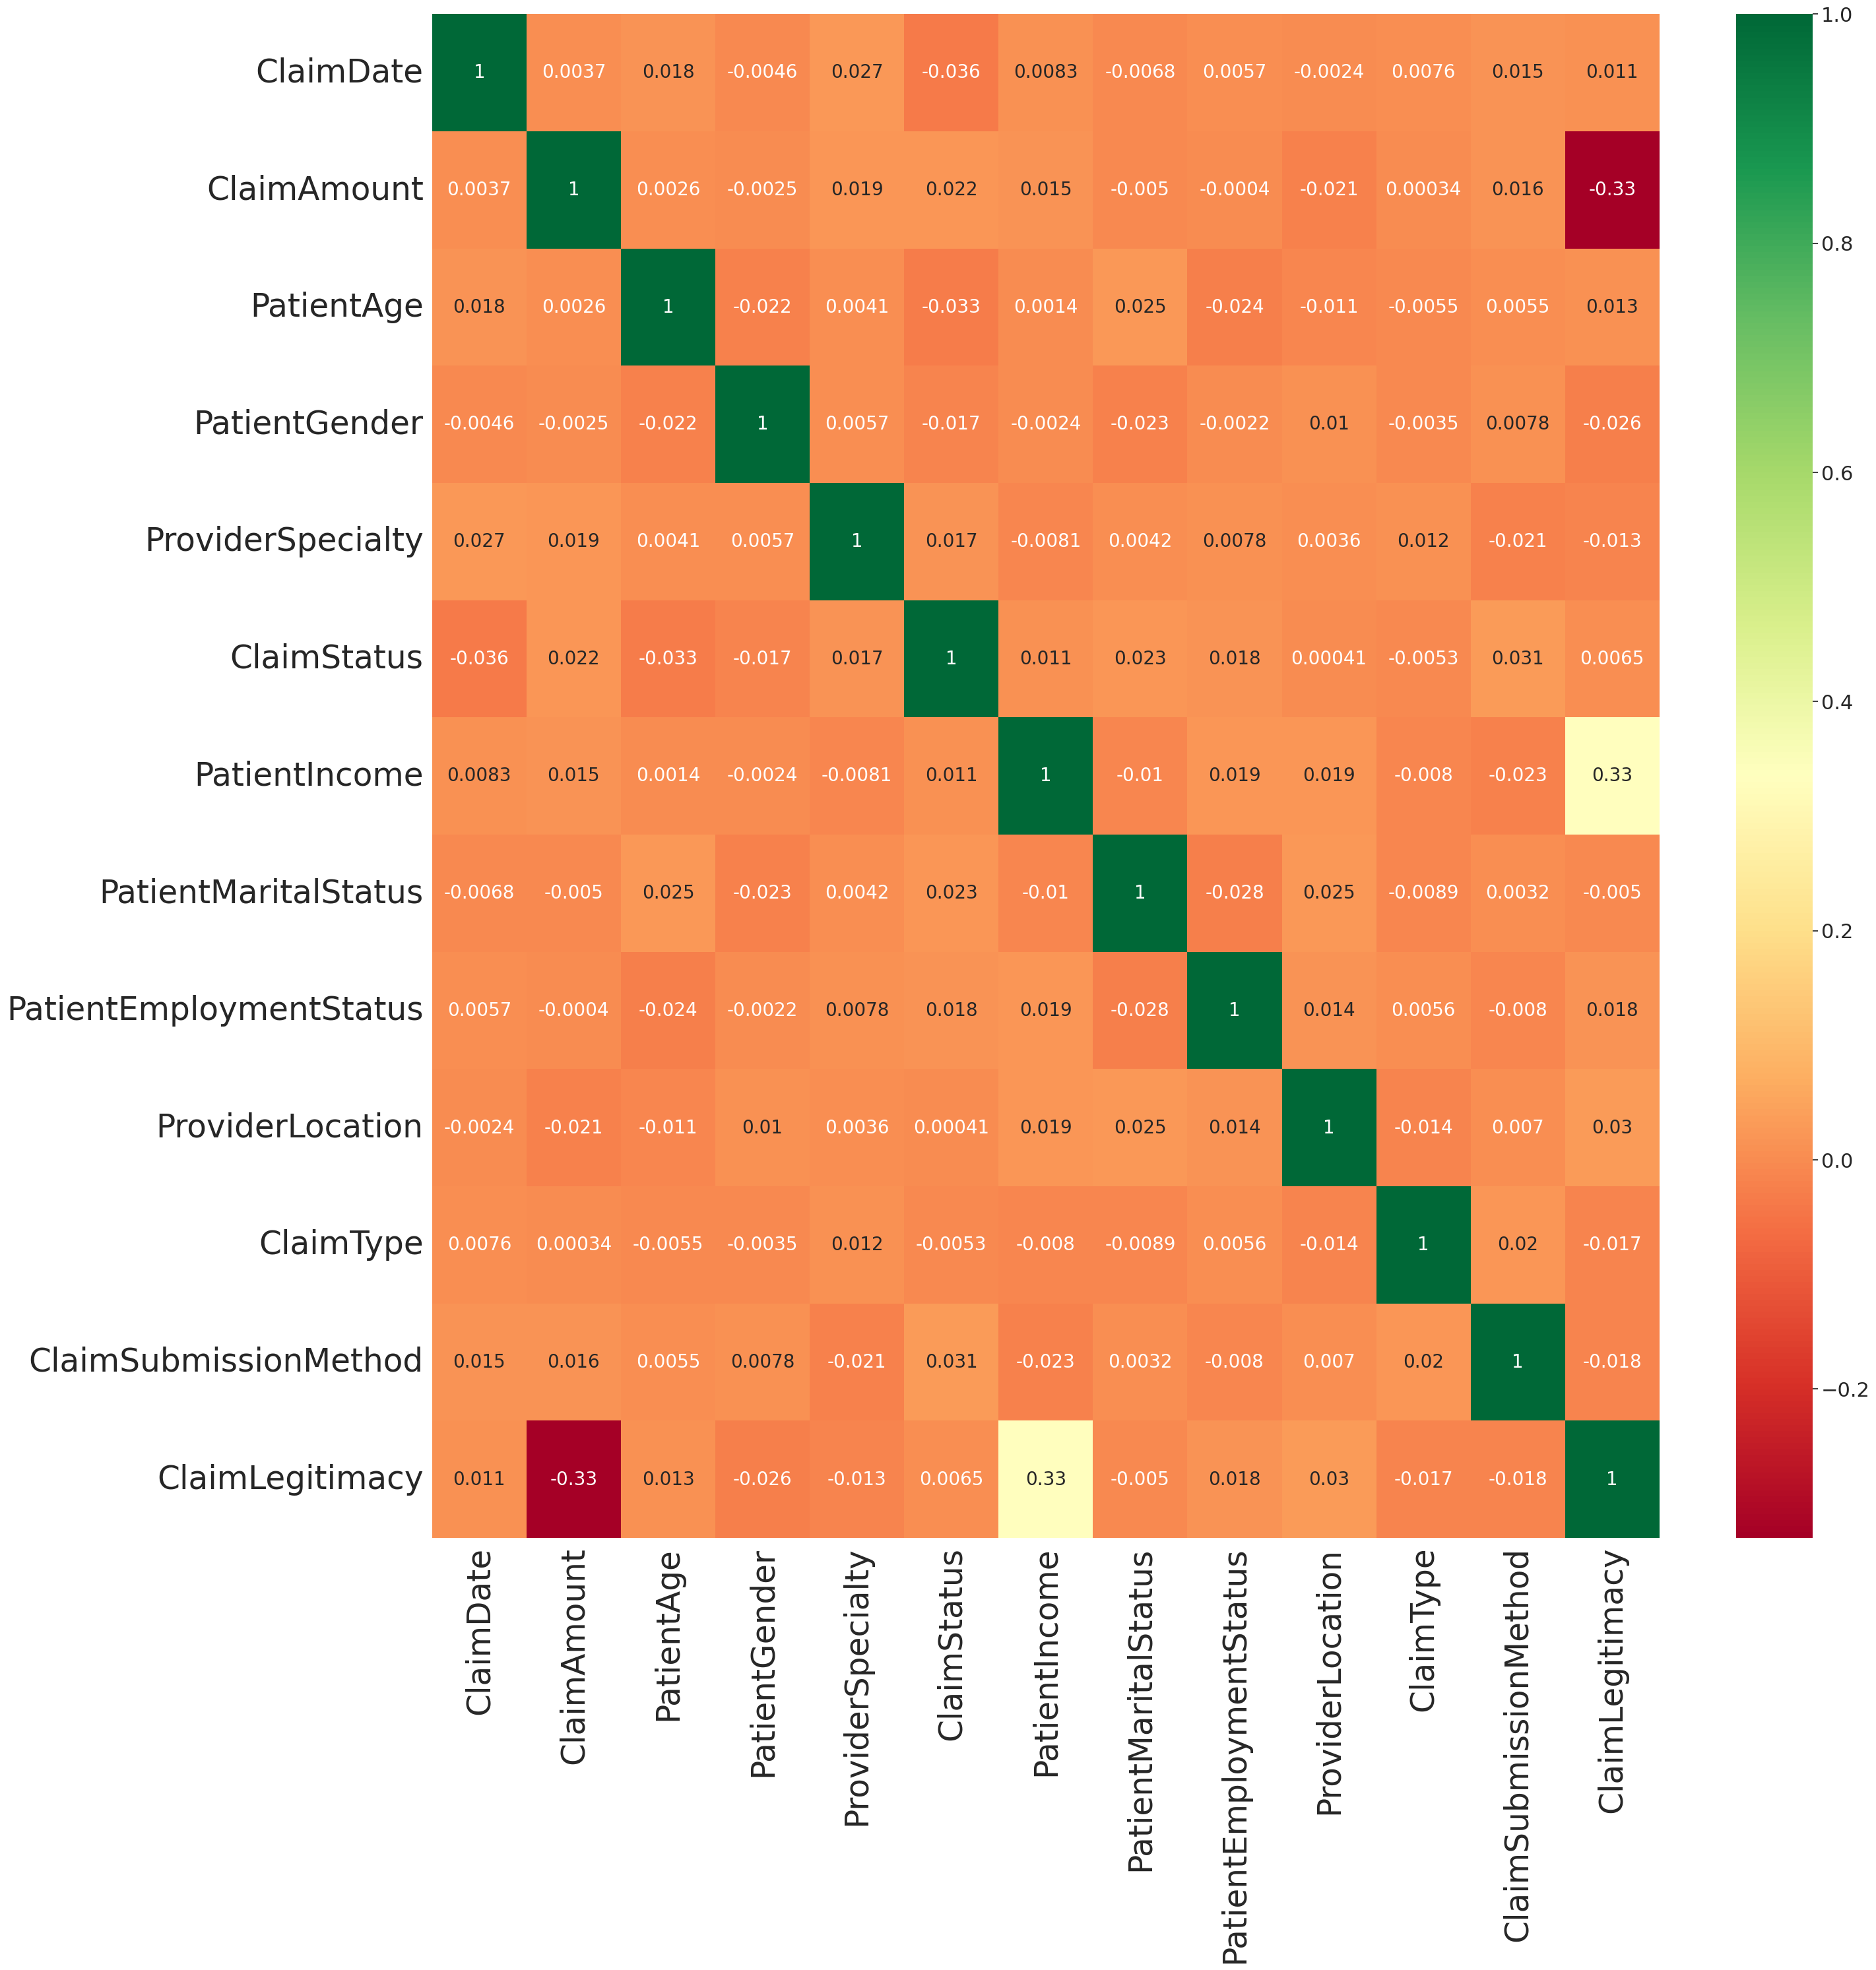

In [ ]:
#pearson corelation /heatmap
sns.set(font_scale=2)
plt.subplots(figsize=(30,30))
heat_plot=sns.heatmap(insurance_fraud.corr(method='pearson'),annot=True,cmap='RdYlGn',annot_kws={'size':20})
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.show()

# Data Spliting (Taget and features variables)

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
oversampled_df.head()

,ClaimDate,ClaimAmount,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,class
0,739075,7820.52,96,0,3,1.0,57595.11,2,0,1582,1,1,1
1,739075,5453.86,95,1,0,0.0,140772.72,3,0,479,1,0,1
2,739075,9519.16,59,0,0,1.0,135530.12,1,0,1444,3,2,1
3,739075,3226.15,36,0,2,2.0,36995.52,0,3,2863,1,2,1
4,739074,3476.56,26,0,0,0.0,96819.09,0,1,1974,2,1,1


In [ ]:

min_max=MinMaxScaler()
X=oversampled_df.drop('class',axis=1)                                                                                     #Changed_somethings here
y=oversampled_df['class']
X_scaled=min_max.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)




In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5556, 12), (1390, 12), (5556,), (1390,))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       661
           1       1.00      1.00      1.00       729

    accuracy                           1.00      1390
   macro avg       1.00      1.00      1.00      1390
weighted avg       1.00      1.00      1.00      1390


Confusion Matrix:
[[661   0]
 [  0 729]]


Text(39.75, 0.5, 'Truth')

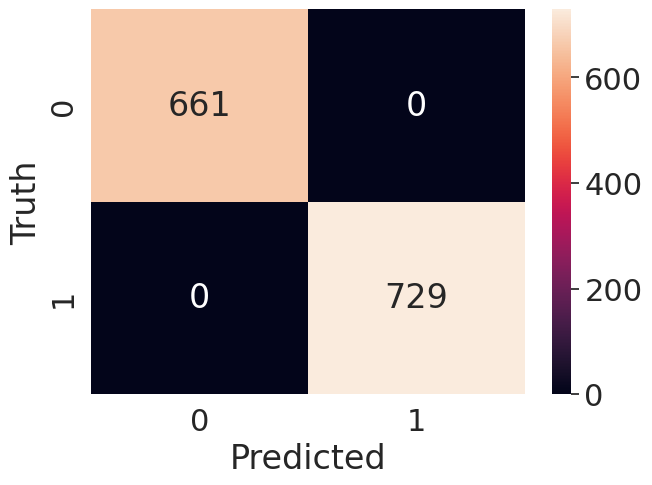

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_model=RandomForestClassifier(random_state=42)
random_model.fit(X_train,y_train)

# Train the model
random_model.fit(X_train, y_train)

# Make predictions
y_pred = random_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# Support Vector Classifier

Accuracy: 95.54%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.43      0.55        47
           1       0.96      0.99      0.98       693

    accuracy                           0.96       740
   macro avg       0.87      0.71      0.76       740
weighted avg       0.95      0.96      0.95       740


Confusion Matrix:
[[ 20  27]
 [  6 687]]


Text(14.750000000000002, 0.5, 'Truth')

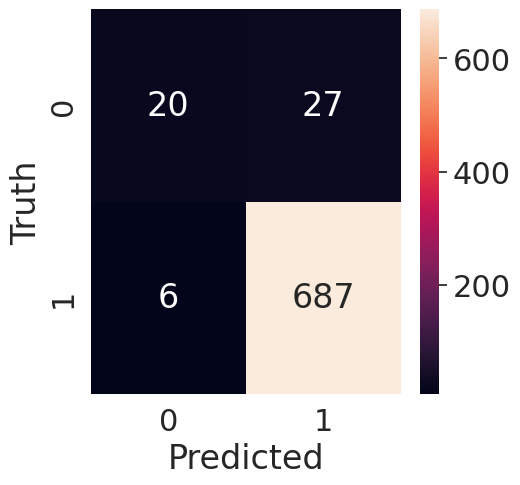

In [ ]:
from sklearn.svm import SVC
svc = SVC()

# Train the model
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# KNN

Accuracy: 93.51%

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.04      0.08        47
           1       0.94      1.00      0.97       693

    accuracy                           0.94       740
   macro avg       0.67      0.52      0.52       740
weighted avg       0.90      0.94      0.91       740


Confusion Matrix:
[[  2  45]
 [  3 690]]


Text(14.750000000000002, 0.5, 'Truth')

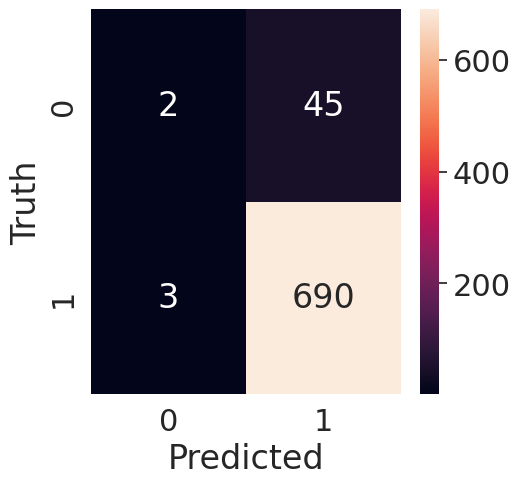

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')